# Convolutional Neural Network

### Importing the libraries

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input

In [21]:
import numpy as np
import os

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [22]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values to [0, 1]
    shear_range=0.2,         # Apply random shear transformations
    zoom_range=0.2,          # Apply random zoom transformations
    horizontal_flip=True     # Enable random horizontal flipping
)

training_set = train_datagen.flow_from_directory(
    '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/training_set',  # Path to training dataset
    target_size=(64, 64),    # Resize all images to 64x64
    batch_size=32,           # Number of samples per batch
    class_mode='binary'      # Classification type ('binary' for 2 classes)
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [23]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize pixel values

test_set = test_datagen.flow_from_directory(
    '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/test_set',  # Path to test dataset
    target_size=(64, 64),    # Resize all images to 64x64
    batch_size=32,           # Number of samples per batch
    class_mode='binary'      # Classification type
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [24]:
cnn = Sequential()

### Step 1 - Convolution

In [25]:
cnn.add(Input(shape=[64, 64, 3]))  # Explicitly define input shape
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

### Step 2 - Pooling

In [26]:
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [27]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [28]:
cnn.add(Flatten())

### Step 4 - Full Connection

In [29]:
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

### Step 5 - Output Layer

In [30]:
cnn.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

## Part 3 - Training the CNN

### Compiling the CNN

In [31]:
cnn.compile(optimizer='adam',  # Optimizer for faster convergence
            loss='binary_crossentropy',  # Loss function for binary classification
            metrics=['accuracy'])  # Metric to track during training

### Training the CNN on the Training set and evaluating it on the Test set

In [65]:
history = cnn.fit(training_set,  # Training data
                  validation_data=test_set,  # Validation data (test set)
                  epochs=25,  # Number of epochs
                  batch_size=32)  # Batch size

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.4901 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.5050 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.5048 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.4859 - loss: 0.6932 - 

## Part 4 - Making a single prediction

In [69]:
from tensorflow.keras.preprocessing import image

# path of two image
img_path_1 = '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/single_prediction/cat_or_dog_1.jpg'
img_path_2 = '/Users/z.s.r/Desktop/LU研究生课程材料/5616ML/Project - CNN for Image Classification/dataset/single_prediction/cat_or_dog_2.jpg'

# first image
test_image_1 = image.load_img(img_path_1, target_size=(64, 64))
test_image_1 = image.img_to_array(test_image_1) / 255
test_image_1 = test_image_1.reshape(1, 64, 64, 3)  

# second image
test_image_2 = image.load_img(img_path_2, target_size=(64, 64))
test_image_2 = image.img_to_array(test_image_2) / 255
test_image_2 = test_image_2.reshape(1, 64, 64, 3)  

In [70]:
# prediction for two image
prediction_1 = cnn.predict(test_image_1)
prediction_2 = cnn.predict(test_image_2)

# prediction result
print(f"Prediction for cat_or_dog_1.jpg: {prediction_1}")
print(f"Prediction for cat_or_dog_2.jpg: {prediction_2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Prediction for cat_or_dog_1.jpg: [[0.4997026]]
Prediction for cat_or_dog_2.jpg: [[0.4997026]]


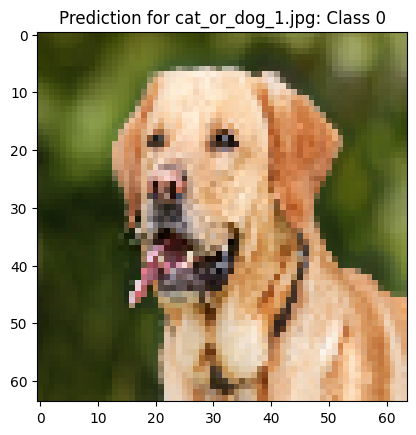

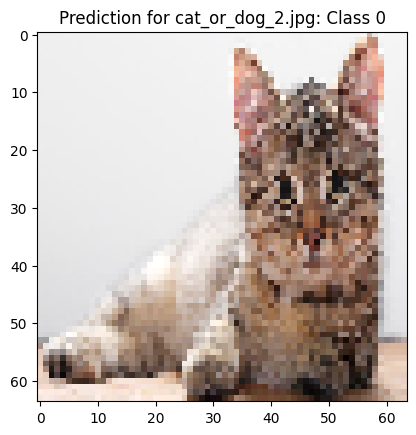

In [68]:
import matplotlib.pyplot as plt

# Step 3: Visualizing the Predictions

# show prediction of the first image
plt.imshow(test_image_1[0])
plt.title(f"Prediction for cat_or_dog_1.jpg: {'Class 1' if prediction_1[0] > 0.5 else 'Class 0'}")
plt.show()

# show prediction of the second image
plt.imshow(test_image_2[0])
plt.title(f"Prediction for cat_or_dog_2.jpg: {'Class 1' if prediction_2[0] > 0.5 else 'Class 0'}")
plt.show()